In [1]:
import pandas as pd
import os
import text_cleaning
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# warning disable
pd.options.mode.chained_assignment = None

# Load Data

In [3]:
directory = './data/'

In [4]:
# load raw data
raw_data_df = pd.read_csv(os.path.join(directory, 'jdihn_clean.csv'))
raw_data_df = raw_data_df[['id', 'judul_dokumen']]
print("Shape:", raw_data_df.shape)
raw_data_df.head()

Shape: (52836, 2)


,id,judul_dokumen
0,1,PERATURAN KEPALA BADAN KEPENDUDUKAN DAN KELUAR...
1,2,Peraturan Menteri Keuangan Nomor 122/PMK.02/20...
2,3,Peraturan Menteri Keuangan Nomor 194/PMK.02/20...
3,4,Peraturan Menteri Keuangan Nomor 274/PMK.04/20...
4,5,Peraturan Menteri Keuangan Nomor 91/PMK.07/201...


# Preprocessing

In [5]:
# apply text cleaning to title
cleaned_df = raw_data_df.copy()
cleaned_df['judul_dokumen'] = cleaned_df['judul_dokumen'].str.lower()
cleaned_df['judul_dokumen'] = cleaned_df['judul_dokumen'].apply(text_cleaning.clean_punc)
cleaned_df['judul_dokumen'] = cleaned_df['judul_dokumen'].apply(text_cleaning.remove_stop_words_indo)
cleaned_df['judul_dokumen'] = cleaned_df['judul_dokumen'].apply(text_cleaning.stemming_indo)
cleaned_df['judul_dokumen'] = cleaned_df['judul_dokumen'].apply(text_cleaning.stemming_eng)

In [6]:
# let's peek the result from a row
index = random.randint(0, cleaned_df.shape[0])
print("Cleaned title:", cleaned_df['judul_dokumen'][index])

Cleaned title: putus presiden nomor tahun kesah tuju perintah republik indonesia perintah republik demokrasi rakyat aljazair kena kerjasama ekonomi teknik


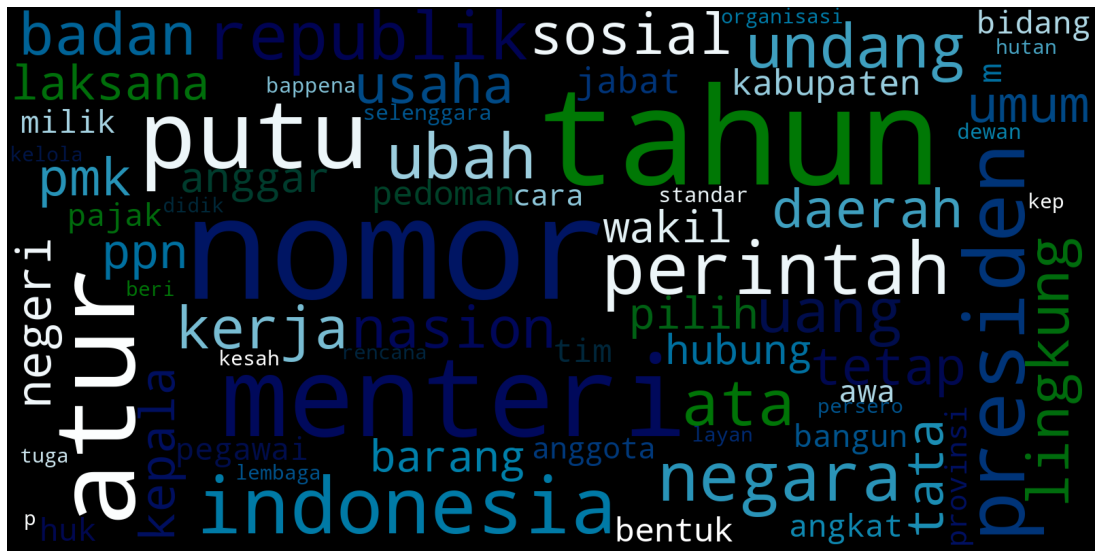

In [7]:
# let's create a word cloud to see the common words in title
plt.figure(figsize=(20, 10))
text = cleaned_df.judul_dokumen.values
cloud = WordCloud(background_color='black', collocations=False,
                  width=1600, height=800,
                  random_state=30, max_font_size=210,
                  min_font_size=30, colormap='ocean_r').generate(" ".join(text))
plt.axis('off')
plt.imshow(cloud)

# Save Data

In [8]:
# save to directory
if not os.path.exists(directory):
    os.mkdir(directory)

saved_data_path = os.path.join(directory, 'prediction_dataset.csv')
cleaned_df.to_csv(saved_data_path, index=False)